# Question 1


Given the following tables:

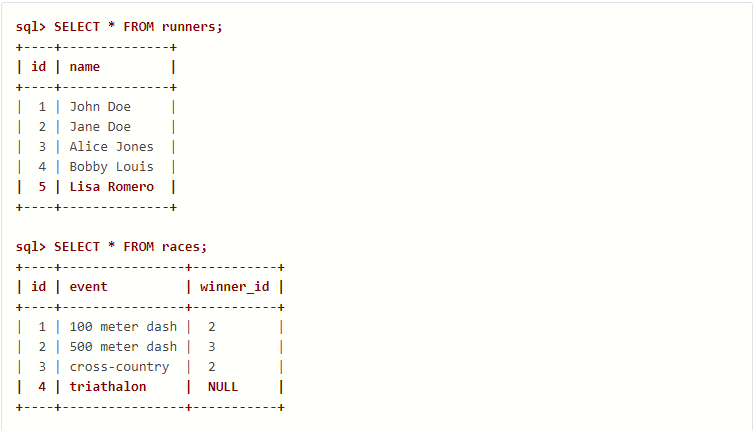


What will be the result of the query below?

SELECT * FROM runners WHERE id NOT IN (SELECT winner_id FROM races)

Explain your answer and also provide an alternative version of this query that will avoid the issue that it exposes.

**Answer:**

    SELECT * FROM runners WHERE id NOT IN (SELECT winner_id FROM races)
This query selects all rows from the runners table where the id does not match any winner_id from the races table.

Given the provided data:

In the runners table, the id values are: 1, 2, 3, 4, 5.
In the races table, the winner_id values are: 2, 3, NULL.
So, the subquery (SELECT winner_id FROM races) returns the values: 2, 3, and NULL.

The outer query selects all rows from the runners table where the id is not in the list [2, 3, NULL]. However, when comparing with NULL, the result is UNKNOWN, not true or false. So, if there's any NULL in the subquery result, it will filter out all rows from the outer query, regardless of other values. In this case, the id 1, 4, and 5 will be filtered out because NULL is included in the list.

The correct result should only be the runners who haven't won any races. In this case, it's John Doe (id: 1) and Bobby Louis (id: 4).

**To avoid this issue, you can use a LEFT JOIN instead of a subquery with IN:**

    SELECT runners.*
    FROM runners
    LEFT JOIN races ON runners.id = races.winner_id
    WHERE races.winner_id IS NULL;


# Question 2


Given two tables created as follows


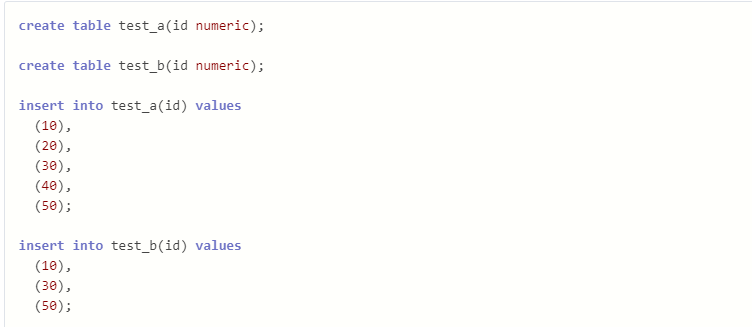

Write a query to fetch values in table test_a that are and not in test_b without using the NOT keyword.


**Answer:**

    SELECT id FROM test_a
    EXCEPT
    SELECT id FROM test_b;


# Question 3

Given the following tables:

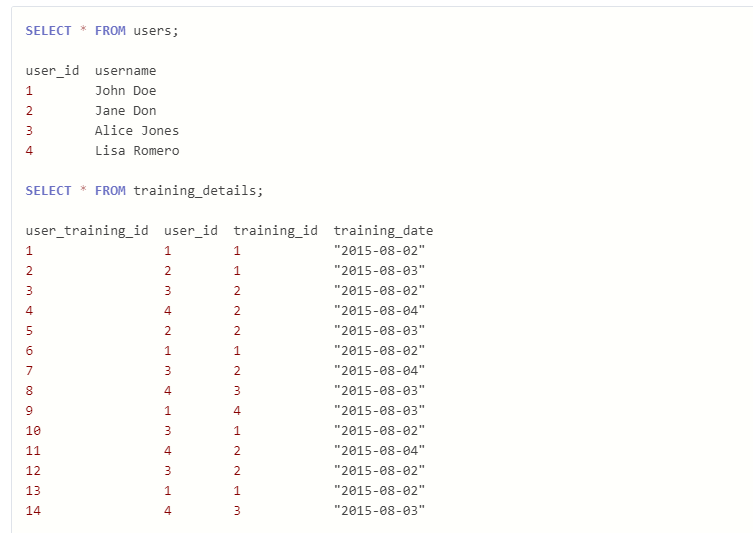

Write a query to to get the list of users who took the a training lesson more than once in the same day, grouped by user and training lesson, each ordered from the most recent lesson date to oldest date.



**Answer**:


    SELECT 
        u.user_id,
        u.username,
        td.training_id,
        td.training_date,
        COUNT(*) AS num_lessons_taken
    FROM 
        users u
    JOIN 
        training_details td ON u.user_id = td.user_id
    GROUP BY 
        u.user_id,
        u.username,
        td.training_id,
        td.training_date
    HAVING 
        COUNT(*) > 1
    ORDER BY 
        td.training_date DESC;


# Question 4

Consider the Employee table below.


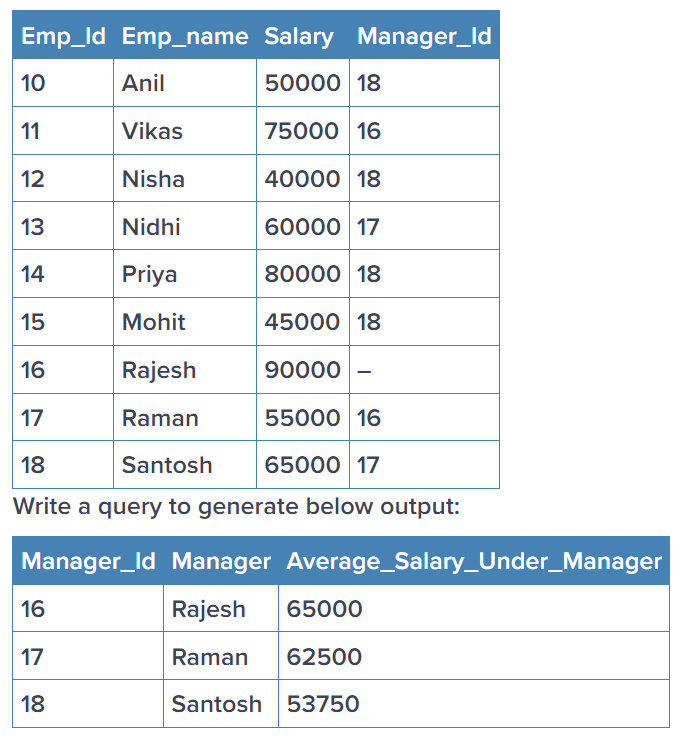


**Answer**

    SELECT Manager_id, Manager, AVG(Salary) AS Average_Salary, COUNT(*) AS Under_Manager
    FROM (
        SELECT Manager_id, Emp_name AS Manager, Salary
        FROM employee
        WHERE Manager_id IS NOT NULL
    ) AS managers
    GROUP BY Manager_id;